In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf
import numpy as np

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
mnist.train.num_examples

55000

In [3]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (55000, 784)
Train labels shape:  (55000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [4]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [5]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [6]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [7]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
tf.summary.scalar("loss", loss)

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [8]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [9]:
with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
tf.summary.scalar("accuracy", accuracy)

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [10]:
merged = tf.summary.merge_all()
init = tf.global_variables_initializer()
train_writer = tf.summary.FileWriter('/tmp/dnn-train', sess.graph)
test_writer = tf.summary.FileWriter('/tmp/dnn-test')
saver = tf.train.Saver()

NameError: name 'sess' is not defined

In [ ]:
n_epochs = 10
batch_size = 50
n_batches = 50
batch_count = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    init.run()
    all_loss = []
    for epoch in range(n_epochs):
        for iteration in range(batch_count):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            one_loss, summary, _ = sess.run([loss, merged, training_op], feed_dict={X: X_batch, y: y_batch})
            all_loss.append(one_loss)
            train_writer.add_summary(summary, epoch * batch_count + iteration)
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print("Epoch", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Loss: ", np.mean(all_loss))

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [26]:
show_graph(tf.get_default_graph())

NameError: name 'show_graph' is not defined

In [11]:
'''
Variate hidden layer size
'''

with tf.name_scope("init"):
    n_inputs = 28*28  # MNIST
    n_hidden = 300
    n_outputs = 10
    n_epochs = 10
    batch_size = 50
    batch_count = mnist.train.num_examples // batch_size

reset_graph()
sess = tf.InteractiveSession()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
tf.summary.scalar("loss", loss)

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
tf.summary.scalar("accuracy", accuracy)

merged = tf.summary.merge_all()
init = tf.global_variables_initializer()
train_writer = tf.summary.FileWriter('/tmp/dnn-train-' + str(n_hidden), sess.graph)

init.run()
all_loss = []
for epoch in range(n_epochs):
    for iteration in range(batch_count):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        one_loss, summary, _ = sess.run([loss, merged, training_op], feed_dict={X: X_batch, y: y_batch})
        all_loss.append(one_loss)
        train_writer.add_summary(summary, epoch * batch_count + iteration)
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print("Epoch", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Loss: ", np.mean(all_loss))

Epoch 0 Train accuracy: 0.88 Test accuracy: 0.8942 Loss:  0.779578
Epoch 1 Train accuracy: 0.9 Test accuracy: 0.9102 Loss:  0.582041
Epoch 2 Train accuracy: 0.88 Test accuracy: 0.917 Loss:  0.49755
Epoch 3 Train accuracy: 0.96 Test accuracy: 0.9242 Loss:  0.44766
Epoch 4 Train accuracy: 0.92 Test accuracy: 0.9295 Loss:  0.413232
Epoch 5 Train accuracy: 0.9 Test accuracy: 0.9327 Loss:  0.387275
Epoch 6 Train accuracy: 0.94 Test accuracy: 0.9356 Loss:  0.366545
Epoch 7 Train accuracy: 0.92 Test accuracy: 0.9394 Loss:  0.349351
Epoch 8 Train accuracy: 0.88 Test accuracy: 0.942 Loss:  0.334682
Epoch 9 Train accuracy: 0.94 Test accuracy: 0.9443 Loss:  0.321893


In [19]:
'''
Variate the number of hidden layers
'''

with tf.name_scope("init"):
    n_inputs = 28*28  # MNIST
    n_hidden = 20
    n_outputs = 10
    n_epochs = 10
    batch_size = 50
    batch_count = mnist.train.num_examples // batch_size

reset_graph()
sess = tf.InteractiveSession()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    '''
    hidden2 = tf.layers.dense(hidden1, n_hidden, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden, name="hidden3",
                              activation=tf.nn.relu)
    '''
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
tf.summary.scalar("loss", loss)

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
tf.summary.scalar("accuracy", accuracy)

merged = tf.summary.merge_all()
init = tf.global_variables_initializer()
train_writer = tf.summary.FileWriter('/tmp/dnn-train-' + str(n_hidden), sess.graph)

init.run()
all_loss = []
for epoch in range(n_epochs):
    for iteration in range(batch_count):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        one_loss, summary, _ = sess.run([loss, merged, training_op], feed_dict={X: X_batch, y: y_batch})
        all_loss.append(one_loss)
        train_writer.add_summary(summary, epoch * batch_count + iteration)
    acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print("Epoch", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Loss: ", np.mean(all_loss))

Epoch 0 Train accuracy: 0.92 Test accuracy: 0.8721 Loss:  1.04761
Epoch 1 Train accuracy: 0.88 Test accuracy: 0.8965 Loss:  0.747533
Epoch 2 Train accuracy: 0.9 Test accuracy: 0.9065 Loss:  0.623237
Epoch 3 Train accuracy: 0.9 Test accuracy: 0.9103 Loss:  0.552652
Epoch 4 Train accuracy: 0.96 Test accuracy: 0.9155 Loss:  0.506059
Epoch 5 Train accuracy: 0.96 Test accuracy: 0.919 Loss:  0.472424
Epoch 6 Train accuracy: 0.84 Test accuracy: 0.9217 Loss:  0.446638
Epoch 7 Train accuracy: 0.94 Test accuracy: 0.9225 Loss:  0.426037
Epoch 8 Train accuracy: 0.84 Test accuracy: 0.9254 Loss:  0.409013
Epoch 9 Train accuracy: 0.92 Test accuracy: 0.9269 Loss:  0.394599


In [ ]:
'''
Reduce training set size
'''
import pylab as pl

train_size = 500
with tf.name_scope("init"):
    n_inputs = 28*28  # MNIST
    n_hidden1 = 300
    n_hidden2 = 100
    n_epochs = 50
    batch_size = 50
    batch_count = train_size // batch_size
    # batch_count = mnist.train.num_examples // batch_size

reset_graph()
sess = tf.InteractiveSession()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

merged = tf.summary.merge_all()
init = tf.global_variables_initializer()

init.run()
train_acc = []
test_acc = []
for epoch in range(n_epochs):
    all_loss = []
    for iteration in range(batch_count):
        # X_batch, y_batch = mnist.train.next_batch(batch_size)
        X_batch, y_batch = mnist.train.images[iteration*batch_size : (iteration+1)*batch_size,], \
                           mnist.train.labels[iteration*batch_size : (iteration+1)*batch_size,]
        one_loss, _ = sess.run([loss, training_op], feed_dict={X: X_batch, y: y_batch})
        all_loss.append(one_loss)
    acc_train = accuracy.eval(feed_dict={X: mnist.train.images[:train_size,], y: mnist.train.labels[:train_size,]})
    # acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    acc_test = accuracy.eval(feed_dict={X: mnist.train.images[train_size:(train_size+1000),],
                                        y: mnist.train.labels[train_size:(train_size+1000),]})
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    print("Epoch", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Loss: ", np.mean(all_loss))
    
pl.plot(train_acc, label='Train Accuracy')
pl.plot(test_acc, label = 'Test Accuracy')
pl.xlabel('Epoch')
pl.ylabel('Accuracy')
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.title("Train set size: " + str(train_size))
pl.show()

Epoch 0 Train accuracy: 0.6815 Test accuracy: 0.6863 Loss:  2.01894
Epoch 1 Train accuracy: 0.809 Test accuracy: 0.8033 Loss:  1.32799
Epoch 2 Train accuracy: 0.8375 Test accuracy: 0.8466 Loss:  0.871382
Epoch 3 Train accuracy: 0.869 Test accuracy: 0.8691 Loss:  0.652726
Epoch 4 Train accuracy: 0.875 Test accuracy: 0.8796 Loss:  0.55067
Epoch 5 Train accuracy: 0.8805 Test accuracy: 0.8869 Loss:  0.485395
Epoch 6 Train accuracy: 0.9 Test accuracy: 0.8925 Loss:  0.445062
Epoch 7 Train accuracy: 0.883 Test accuracy: 0.8998 Loss:  0.411068
Epoch 8 Train accuracy: 0.896 Test accuracy: 0.9022 Loss:  0.393546
Epoch 9 Train accuracy: 0.896 Test accuracy: 0.9065 Loss:  0.377842
Epoch 10 Train accuracy: 0.905 Test accuracy: 0.9077 Loss:  0.356704
Epoch 11 Train accuracy: 0.9 Test accuracy: 0.9095 Loss:  0.3479
Epoch 12 Train accuracy: 0.9045 Test accuracy: 0.9118 Loss:  0.334539
Epoch 13 Train accuracy: 0.909 Test accuracy: 0.914 Loss:  0.32753
Epoch 14 Train accuracy: 0.909 Test accuracy: 0.914

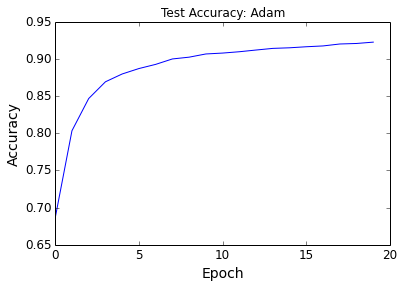

In [52]:
'''
Use other optimizer
'''
import pylab as pl

with tf.name_scope("init"):
    n_inputs = 28*28  # MNIST
    n_hidden1 = 300
    n_hidden2 = 100
    n_epochs = 20
    batch_size = 50
    batch_count = mnist.train.num_examples // batch_size

reset_graph()
sess = tf.InteractiveSession()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    # optimizer = tf.train.GradientDescentOptimizer(0.001)
    # tf.train.MomentumOptimizer(learning_rate = 0.001, momentum = 0.9)
    tf.train.AdamOptimizer(learning_rate = 0.001)
    training_op = optimizer.minimize(loss)

with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

merged = tf.summary.merge_all()
init = tf.global_variables_initializer()

init.run()
test_acc = []
for epoch in range(n_epochs):
    all_loss = []
    for iteration in range(batch_count):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        one_loss, _ = sess.run([loss, training_op], feed_dict={X: X_batch, y: y_batch})
        all_loss.append(one_loss)
    acc_train = accuracy.eval(feed_dict={X: mnist.train.images[:train_size,], y: mnist.train.labels[:train_size,]})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    test_acc.append(acc_test)
    print("Epoch", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Loss: ", np.mean(all_loss))
    

pl.plot(test_acc)
pl.xlabel('Epoch')
pl.ylabel('Accuracy')
pl.title('Test Accuracy: Adam')
pl.show()